In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.metrics import r2_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
import pickle

In [5]:
df=pd.read_csv('/content/kc_house_data.csv')
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,country
0,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,1180,0,1955,0,98178,USA
1,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,2170,400,1951,1991,98125,USA
2,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,770,0,1933,0,98028,USA
3,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,1050,910,1965,0,98136,USA
4,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,1680,0,1987,0,98074,USA


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           21613 non-null  object 
 1   price          21613 non-null  float64
 2   bedrooms       21613 non-null  int64  
 3   bathrooms      21613 non-null  float64
 4   sqft_living    21613 non-null  int64  
 5   sqft_lot       21613 non-null  int64  
 6   floors         21613 non-null  float64
 7   waterfront     21613 non-null  int64  
 8   view           21613 non-null  int64  
 9   condition      21613 non-null  int64  
 10  sqft_above     21613 non-null  int64  
 11  sqft_basement  21613 non-null  int64  
 12  yr_built       21613 non-null  int64  
 13  yr_renovated   21613 non-null  int64  
 14  zipcode        21613 non-null  int64  
 15  country        21613 non-null  object 
dtypes: float64(3), int64(11), object(2)
memory usage: 2.6+ MB


In [7]:
df.shape

(21613, 16)

In [8]:
df.dtypes

date              object
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
country           object
dtype: object

In [9]:
df.isnull().sum().sum()

0

In [10]:
df.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode
count,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,5.401822e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,1788.390691,291.509045,1971.005136,84.402258,98077.939805
std,3.673622e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,828.090978,442.575043,29.373411,401.679240,53.505026
min,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000
25%,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000
50%,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000
75%,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000
max,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000


In [11]:
df['country'].value_counts()

USA    21613
Name: country, dtype: int64

In [12]:
# we can drop the country column as all it contains only 1 unique value

df.drop('country',axis=1,inplace=True)

In [13]:
df_desc = df.describe()
q1 = df_desc.loc['25%']
q3 = df_desc.loc['75%']
iqr = q3 - q1
df_desc.loc['lower_bound'] = q1 - 1.5 * iqr
df_desc.loc['upper_bound'] = q3 + 1.5 * iqr

df_desc

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode
count,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,5.401822e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,1788.390691,291.509045,1971.005136,84.402258,98077.939805
std,3.673622e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,828.090978,442.575043,29.373411,401.679240,53.505026
min,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000
25%,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000
50%,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000
75%,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000
max,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000
lower_bound,-1.626250e+05,1.500000,0.625000,-257.500000,-3.432000e+03,-0.500000,0.000000,0.000000,1.500000,-340.000000,-840.000000,1882.000000,0.000000,97905.500000
upper_bound,1.129575e+06,5.500000,3.625000,4234.500000,1.916000e+04,3.500000,0.000000,0.000000,5.500000,3740.000000,1400.000000,2066.000000,0.000000,98245.500000


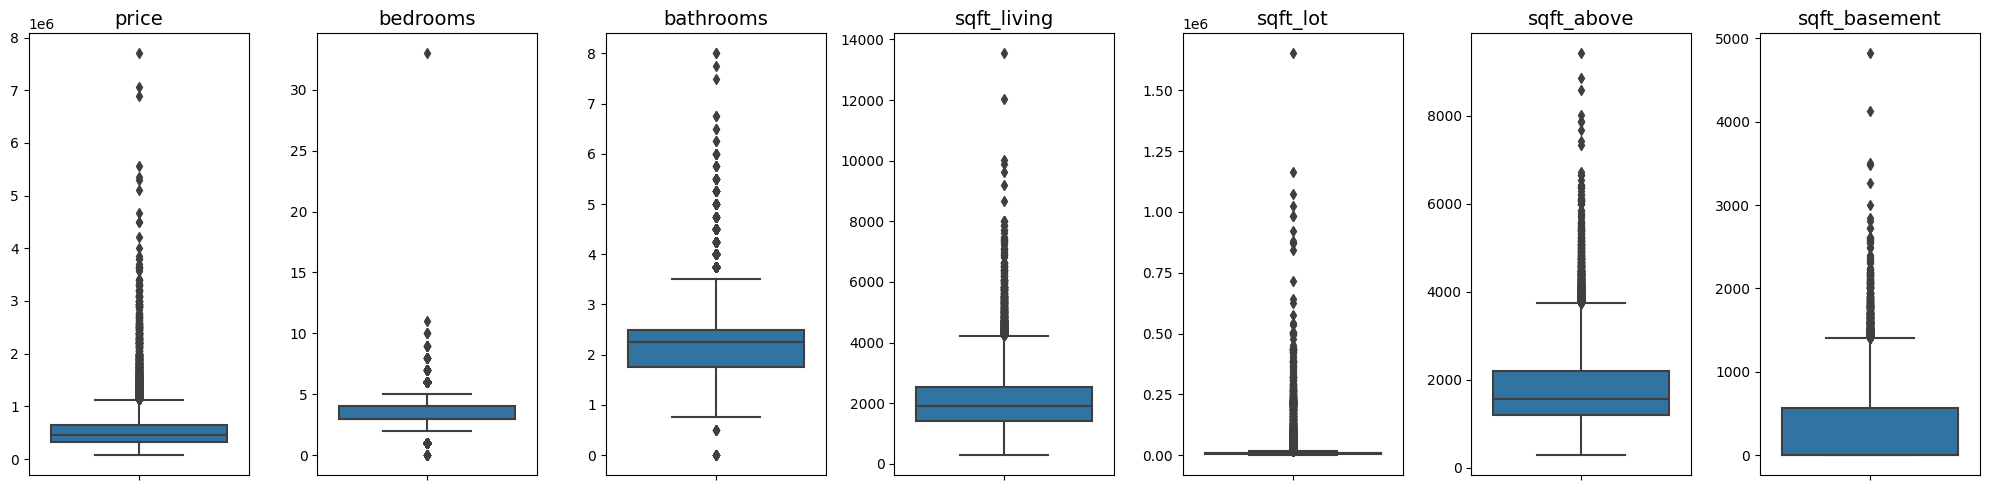

In [14]:
# Select columns for box plot
cols = ['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'sqft_above', 'sqft_basement']

# Create subplots
fig, axes = plt.subplots(1, 7, figsize=(20, 5))

# Generate boxplots for each column
for i, col in enumerate(cols):
    sns.boxplot(y=col, data=df, ax=axes[i])
    axes[i].set_title(col, fontsize=14)
    axes[i].set_ylabel('')

# Adjust spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()

In [15]:
# Remove outliers for price column
price_upper_limit = 4500000
df = df[df['price'] <= price_upper_limit]

# Remove outliers for bedrooms column
bedrooms_upper_limit = 7
df = df[df['bedrooms'] <= bedrooms_upper_limit]

# Remove outliers for bathrooms column
bathrooms_upper_limit = 5
df = df[(df['bathrooms'] < bathrooms_upper_limit) & (df['bathrooms'] >= 1)]

# Remove outliers for sqft_living column
sqft_living_upper_limit = 8000
df = df[df['sqft_living'] <= sqft_living_upper_limit]

# Remove outliers for sqft_lot column
sqft_lot_upper_limit = 50000
df = df[df['sqft_lot'] <= sqft_lot_upper_limit]

# Remove outliers for sqft_above column
sqft_above_upper_limit = 6000
df = df[df['sqft_above'] <= sqft_above_upper_limit]

# Remove outliers for sqft_basement column
sqft_basement_upper_limit = 2500
df = df[df['sqft_basement'] <= sqft_basement_upper_limit]

df.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode
count,2.056500e+04,20565.000000,20565.000000,20565.000000,20565.000000,20565.000000,20565.000000,20565.000000,20565.000000,20565.000000,20565.000000,20565.000000,20565.000000,20565.000000
mean,5.296518e+05,3.362509,2.096317,2039.968296,9126.954826,1.492852,0.006613,0.223195,3.412789,1751.913591,288.054705,1970.678726,83.475079,98079.283394
std,3.373325e+05,0.880435,0.735950,851.989399,7551.192545,0.541797,0.081054,0.746630,0.651067,774.132434,429.414988,29.551693,399.595119,53.909004
min,7.800000e+04,0.000000,1.000000,390.000000,520.000000,1.000000,0.000000,0.000000,1.000000,390.000000,0.000000,1900.000000,0.000000,98001.000000
25%,3.199500e+05,3.000000,1.500000,1410.000000,5000.000000,1.000000,0.000000,0.000000,3.000000,1180.000000,0.000000,1951.000000,0.000000,98033.000000
50%,4.470000e+05,3.000000,2.250000,1890.000000,7447.000000,1.500000,0.000000,0.000000,3.000000,1540.000000,0.000000,1974.000000,0.000000,98072.000000
75%,6.350000e+05,4.000000,2.500000,2510.000000,10046.000000,2.000000,0.000000,0.000000,4.000000,2160.000000,560.000000,1997.000000,0.000000,98118.000000
max,3.850000e+06,7.000000,4.750000,7620.000000,49936.000000,3.500000,1.000000,4.000000,5.000000,5980.000000,2490.000000,2015.000000,2015.000000,98199.000000


<ipython-input-16-82f6b0774d82>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr()


<Axes: >

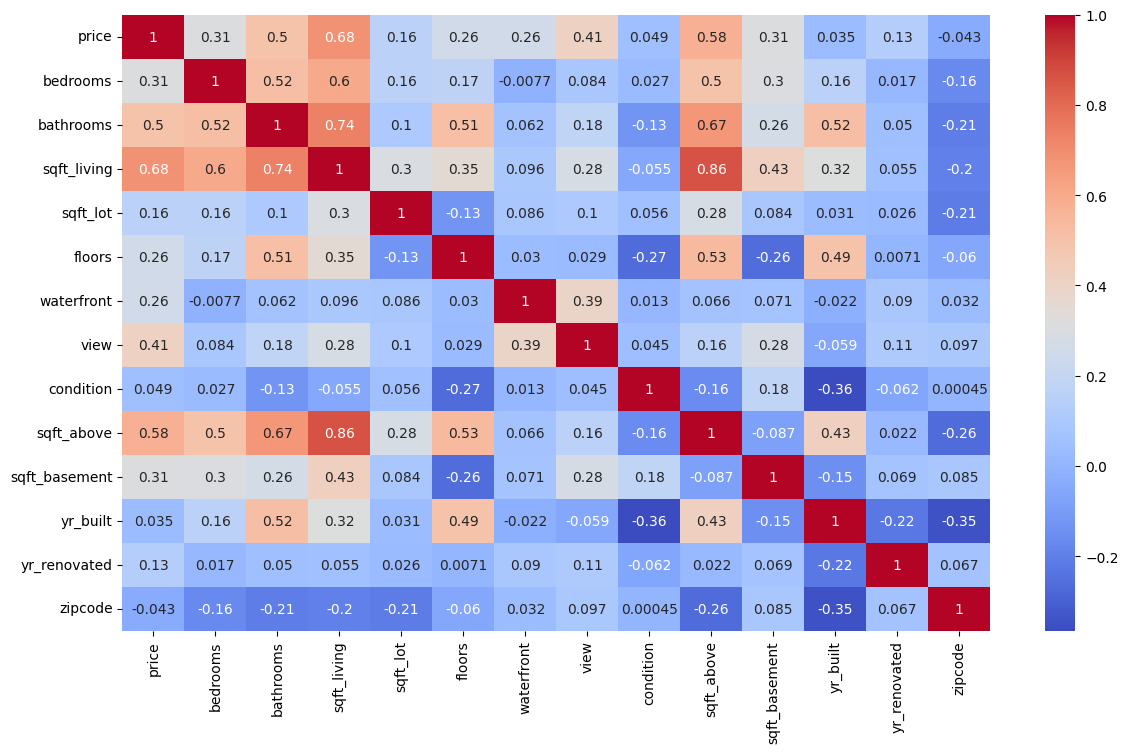

In [16]:
# Create a correlation matrix for numerical variables
corr_matrix = df.corr()

# Visualize the correlation matrix using a heatmap
fig, ax = plt.subplots(figsize=(14, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', ax=ax)

In [17]:
# As observed from the above heatmap, the following columns (condition,yr_built, zipcode) do not have a significant correlation with the price,  so remove them
# The following features show a positive correlation with the target variable "price" : "bathrooms", "sqft_living", and "sqft_above

In [18]:
df = df.drop(["zipcode", "yr_built", "condition",'date'], axis = 1)
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,sqft_above,sqft_basement,yr_renovated
0,221900.0,3,1.00,1180,5650,1.0,0,0,1180,0,0
1,538000.0,3,2.25,2570,7242,2.0,0,0,2170,400,1991
2,180000.0,2,1.00,770,10000,1.0,0,0,770,0,0
3,604000.0,4,3.00,1960,5000,1.0,0,0,1050,910,0
4,510000.0,3,2.00,1680,8080,1.0,0,0,1680,0,0


In [19]:
df["floors"].value_counts().to_frame()

,floors
1.0,10217
2.0,7785
1.5,1804
3.0,608
2.5,145
3.5,6


<Axes: xlabel='waterfront', ylabel='price'>

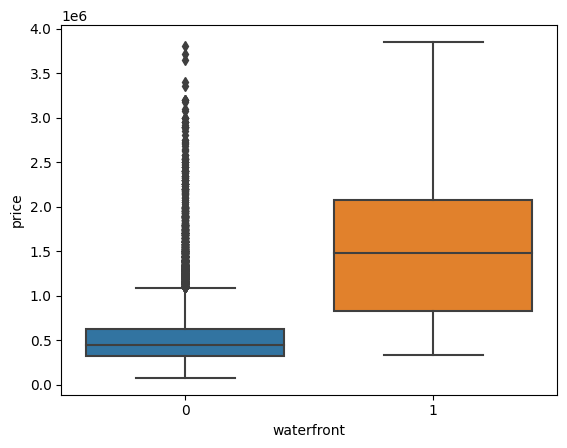

In [20]:
# Checking the effect on price for the house with waterfront and without waterfront:-

sns.boxplot(x= "waterfront", y = "price", data = df)

In [21]:
features =["floors", "waterfront" ,"bedrooms" ,"sqft_basement" ,"view" ,"bathrooms","sqft_above","sqft_living"]
X = df[features]
scaler=StandardScaler()
scaled_data=scaler.fit_transform(X)
X=scaled_data

In [22]:
Y = df['price']

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.20, random_state=4,shuffle=True)


print("number of test samples:", x_test.shape)
print("number of training samples:",x_train.shape)

number of test samples: (4113, 8)
number of training samples: (16452, 8)


In [23]:
model_1=LinearRegression()
model_1.fit(x_train,y_train)
train_prediction_1=model_1.predict(x_train)
test_prediction_1=model_1.predict(x_test)
print(f'Training data accuracy:{model_1.score(x_train,y_train)}')
print(f'Testing data accuracy:{model_1.score(x_test,y_test)}')

Training data accuracy:0.5402505788193457
Testing data accuracy:0.5340858031164072


In [24]:
r2_score(y_test,test_prediction_1)

0.5340858031164072

In [25]:
model_2=Lasso()
model_2.fit(x_train,y_train)
train_prediction_2=model_2.predict(x_train)
test_prediction_2=model_2.predict(x_test)
print(f'Training data accuracy:{model_2.score(x_train,y_train)}')
print(f'Testing data accuracy:{model_2.score(x_test,y_test)}')

Training data accuracy:0.5402505786791479
Testing data accuracy:0.5340862140190117


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.118e+12, tolerance: 1.908e+11
  model = cd_fast.enet_coordinate_descent(


In [26]:
model_3=Ridge(alpha=0.1)
model_3.fit(x_train,y_train)
train_prediction_3=model_3.predict(x_train)
test_prediction_3=model_3.predict(x_test)
print(f'Training data accuracy:{model_3.score(x_train,y_train)}')
print(f'Testing data accuracy:{model_3.score(x_test,y_test)}')

Training data accuracy:0.5402505788037417
Testing data accuracy:0.5340859685463035


In [27]:
model_4=DecisionTreeRegressor()
model_4.fit(x_train,y_train)
train_prediction_4=model_4.predict(x_train)
test_prediction_4=model_4.predict(x_test)
print(f'Training data accuracy:{model_4.score(x_train,y_train)}')
print(f'Testing data accuracy:{model_4.score(x_test,y_test)}')

Training data accuracy:0.9356330756851587
Testing data accuracy:0.25514338348289045


In [28]:
model_5=RandomForestRegressor()
model_5.fit(x_train,y_train)
train_prediction_5=model_5.predict(x_train)
test_prediction_5=model_5.predict(x_test)
print(f'Training data accuracy:{model_5.score(x_train,y_train)}')
print(f'Testing data accuracy:{model_5.score(x_test,y_test)}')

Training data accuracy:0.8873891952383
Testing data accuracy:0.5348378579471618


In [ ]:
model_6=GradientBoostingRegressor()
model_6.fit(x_train,y_train)
train_prediction_6=model_6.predict(x_train)
test_prediction_6=model_6.predict(x_test)
print(f'Training data accuracy:{model_6.score(x_train,y_train)}')
print(f'Testing data accuracy:{model_6.score(x_test,y_test)}')


In [30]:
print(f'r2_score: {r2_score(y_test,test_prediction_6)}')

r2_score: 0.5773128575883755


In [31]:
# From all of the models, GradientBoostingRegressor is showing the highest accuracy and r2_score

In [41]:
model=GradientBoostingRegressor(criterion='squared_error',max_features='sqrt',min_samples_leaf=2,min_samples_split=2)
model.fit(x_train,y_train)
train_prediction=model.predict(x_train)
test_prediction=model.predict(x_test)
print(f'Training data accuracy:{model.score(x_train,y_train)}')
print(f'Testing data accuracy:{model.score(x_test,y_test)}')

Training data accuracy:0.6308372219522611
Testing data accuracy:0.5769645079772593


In [42]:
pickle.dump(model,open('model.pkl','wb'))